In [1]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
from sklearn.compose import make_column_selector as selector

In [2]:
data=pd.read_csv('regression_data.csv')

In [3]:
data.to_csv('regression_data.csv',index=False)

In [4]:
data

,Age,AppliedAmount,Amount,Interest,LoanDuration,EmploymentDurationCurrentEmployer,IncomeTotal,LiabilitiesTotal,DebtToIncome,MonthlyPaymentDay,...,Education,MaritalStatus,EmploymentStatus,OccupationArea,HomeOwnershipType,RecoveryStage,Rating,Restructured,CreditScoreEsMicroL,Default
0,61,319.5582,115.0408,30.00,12,UpTo3Years,3665.0,0.00,0.00,25,...,Vocational education,other,Fully employed,NaN,other,NaN,HR,False,M,Not Defaulter
1,48,191.7349,140.6057,25.00,1,MoreThan5Years,3665.0,0.00,0.00,15,...,Higher education,Married,Fully employed,Other,other,NaN,HR,False,M,Not Defaulter
2,58,319.5582,319.5409,25.00,20,Other,3665.0,0.00,0.00,25,...,Secondary education,other,Fully employed,Mining,other,NaN,HR,True,M,Defaulter
3,23,127.8233,57.5205,45.00,15,UpTo3Years,3665.0,0.00,0.00,15,...,Basic education,Cohabitant,Unemployed_Partially employed,Processing,other,NaN,HR,False,M,Not Defaulter
4,25,319.5582,319.5436,30.00,12,UpTo3Years,3665.0,0.00,0.00,25,...,Secondary education,Single,Fully employed,NaN,other,NaN,HR,False,M,Defaulter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77389,37,3000.0000,3000.0000,31.01,60,MoreThan5Years,1400.0,500.00,7.69,1,...,Vocational education,Cohabitant,Fully employed,Processing,Council house,Recovery,D,False,M,Defaulter
77390,35,3000.0000,3000.0000,18.25,60,MoreThan5Years,2265.0,1670.44,31.58,7,...,Vocational education,Cohabitant,Fully employed,Construction,Owner,Collection,B,False,M,Not Defaulter
77391,40,2500.0000,2500.0000,24.83,60,MoreThan5Years,2500.0,1350.00,3.22,1,...,Vocational education,other,Self-employed_Entrepreneur_Retiree,Retail and wholesale,Owner,Recovery,HR,False,M,Defaulter
77392,47,3000.0000,3000.0000,17.74,60,MoreThan5Years,540.0,732.05,44.35,1,...,Higher education,other,Fully employed,Hospitality and catering,Tenant_unfurnished propert,Recovery,B,True,M,Defaulter


In [5]:
# cat_cols=['NewCreditCustomer','VerificationType','LanguageCode','Gender','UseOfLoan','Education','MaritalStatus','EmploymentStatus','OccupationArea',
# 'HomeOwnershipType','RecoveryStage','Rating','Restructured','Default','CreditScoreEsMicroL']
# for i in cat_cols:
#     data[i]=data[i].astype('category')

In [6]:
data.dtypes

Age                                            int64
AppliedAmount                                float64
Amount                                       float64
Interest                                     float64
LoanDuration                                   int64
EmploymentDurationCurrentEmployer             object
IncomeTotal                                  float64
LiabilitiesTotal                             float64
DebtToIncome                                 float64
MonthlyPaymentDay                              int64
CreditScoreEeMini                            float64
PrincipalPaymentsMade                        float64
PrincipalBalance                             float64
InterestAndPenaltyBalance                    float64
NoOfPreviousLoansBeforeLoan                  float64
AmountOfPreviousLoansBeforeLoan              float64
LogBidsPortfolioManager                      float64
LogBidsApi                                   float64
LogBidsManual                                f

In [7]:
num_cols=data.select_dtypes(include=['int','float']).columns
num_cols

Index(['Age', 'AppliedAmount', 'Amount', 'Interest', 'LoanDuration',
       'IncomeTotal', 'LiabilitiesTotal', 'DebtToIncome', 'MonthlyPaymentDay',
       'CreditScoreEeMini', 'PrincipalPaymentsMade', 'PrincipalBalance',
       'InterestAndPenaltyBalance', 'NoOfPreviousLoansBeforeLoan',
       'AmountOfPreviousLoansBeforeLoan', 'LogBidsPortfolioManager',
       'LogBidsApi', 'LogBidsManual', 'LogInterest', 'LogMonthlyPayment',
       'LogIncomeTotal', 'LogExistingLiabilities', 'LogRefinanceLiabilities',
       'LogFreeCash', 'LogInterestAndPenaltyPaymentsMade',
       'LogPreviousEarlyRepaymentsCountBeforeLoan', 'EMI', 'ELA', 'ROI'],
      dtype='object')

In [8]:
cat_cols=data.select_dtypes(exclude=['int','float']).columns
cat_cols

Index(['EmploymentDurationCurrentEmployer', 'NewCreditCustomer',
       'VerificationType', 'LanguageCode', 'Gender', 'UseOfLoan', 'Education',
       'MaritalStatus', 'EmploymentStatus', 'OccupationArea',
       'HomeOwnershipType', 'RecoveryStage', 'Rating', 'Restructured',
       'CreditScoreEsMicroL', 'Default'],
      dtype='object')

In [9]:
#0 Not set 1 Income unverified 2 Income unverified, cross-referenced by phone 3 Income verified 4 Income and expenses verified

In [10]:
# data['VerificationType'] = data['VerificationType'].map({0.0: "Not set",1.0:"Income unverified",2.0:"Income unverified cross-referenced by phone",3.0:"Income verified",4.0:"Income and expenses verified"})
# data['VerificationType'].value_counts()

In [11]:
# data['Default']=data['Default'].map({1:"Defaulter",0:"Not Defaulter"})
# data['Default'].value_counts()

In [12]:
# data['LanguageCode']=data['LanguageCode'].map({0:"estonia",2:"Finish",3:"spanish",1:"other"})
# data['LanguageCode'].value_counts()

In [13]:
# data['Gender']=data['Gender'].map({0.0:"Male",1.0:"Woman",2.0:"Undefined"})
# data['Gender'].value_counts()

In [14]:
# 0 Loan consolidation 1 Real estate 2 Home improvement 3 Business 4 Education 
# 5 Travel 6 Vehicle 7 Other 8 Health 101 Working capital financing 
# 102 Purchase of machinery equipment 103 Renovation of real estate
# 104 Accounts receivable financing 105 Acquisition of means of transport
# 106 Construction finance 107 Acquisition of stocks 108 Acquisition of real estate
# 109 Guaranteeing obligation 110 Other business All codes in format 1XX are for
# business loans that are not supported since October 2012

In [15]:
#1 Married 2 Cohabitant 3 Single 4 Divorced 5 Widow

In [16]:
# data['MaritalStatus']=data['MaritalStatus'].map({1:"Married",2:"Cohabitant",3:"Single",4:"Divorced",5:"Widow",
#                                                  -1:"other",0:"other"})
# data['MaritalStatus'].value_counts()

In [17]:
# data['UseOfLoan']=data['UseOfLoan'].map({2:"Not set",0:"other",1:"Home improvement",3:"Loan consolidation",5:"Vehicle",6:"Travel"
#                                         ,4:"Business",7:"Education",8:"Any",9:"Any",10:"Any",11:"Any",12:"Any"})
# data['UseOfLoan'].value_counts()

In [18]:
#1 Primary education 2 Basic education 3 Vocational education 4 Secondary education 5 Higher education
# data['Education']=data['Education'].map({2:"Basic education",1:"Primary education",3:"Vocational education",5:"Higher education",6:"other"
#                                         ,4:"Secondary education"})
# data['Education'].value_counts()

In [19]:
# data['EmploymentStatus']=data['EmploymentStatus'].map({0:"Fully employed",1:"Self-employed_Entrepreneur_Retiree",-1:"Unemployed_Partially employed"})
# data['EmploymentStatus'].value_counts()
#1 Unemployed 2 Partially employed 3 Fully employed 4 Self-employed 5 Entrepreneur 6 Retiree

In [20]:
# data['OccupationArea']=data['OccupationArea'].map({1:"Other",-1:"other",2:"Mining",3:"Processing", 4:"Energy",5:"Utilities",6:"Construction" ,
# #                                                    7:"Retail and wholesale",8:"Transport and warehousing",9:"Hospitality and catering",10:"Info and telecom",
#                                                    11:"Finance and insurance",12:"Real-estate",13:"Research",14:"Administrative",15:"Civil service & military",
#                                                    16:"Education",17:"Healthcare and social help",18:"Art and entertainment",19:"Agriculture,forestry and fishing"})
# data['OccupationArea'].value_counts()
#1 Other 2 Mining 3 Processing 4 Energy 5 Utilities 6 Construction 7 Retail and wholesale 8 Transport and warehousing
# 9 Hospitality and catering 10 Info and telecom 11 Finance and insurance 12 Real-estate 13 Research 14 Administrative 
# 15 Civil service & military 16 Education 17 Healthcare and social help 
# 18 Art and entertainment 19 Agriculture, forestry and fishing

In [21]:
#0 Homeless 1 Owner 2 Living with parents 3 Tenant, pre-furnished property 4 Tenant, 
#unfurnished property 5 Council house 6 Joint tenant 7 Joint ownership 8 Mortgage 9 Owner with encumbrance 10 Othe
# data['HomeOwnershipType']=data['HomeOwnershipType'].map({0:"homeless",5:"Owner",-1:"other",3:"Tenant_pre-furnished property",
#                                                         2:"Living with parents",6:"Mortgage",1:"Tenant_unfurnished propert",10:"other",
#                                                         7:"Joint ownership",8:"Joint tenant",4:"Council house",9:"Owner with encumbrance"})
# data['HomeOwnershipType'].value_counts()

In [22]:
# data['RecoveryStage']=data['RecoveryStage'].map({1:"Collection",2:"Recovery"})
# data['RecoveryStage'].value_counts()
#Current stage according to the recovery model 1 Collection 2 Recovery 3 Write Off

In [23]:
# data['Rating']=data['Rating'].map({1:"F",0:"HR",3:"E",4:"D",2:"C",6:"B",5:"A",7:"AA"})
# data['Rating'].value_counts()

In [24]:
# data['CreditScoreEsMicroL']=data['CreditScoreEsMicroL'].map({0:"M",3:"M1",2:"M5",5:"M2",1:"M3",7:"M4",6:"M6",8:"M8",4:"M9",9:"M7",10:"M10"})
# #data['EmploymentDurationCurrentEmployer'].value_counts()

In [25]:
#MoreThan5Years  UpTo1Yea UpTo5Years UpTo3Years  Retiree  UpTo4Years  Other  missing  TrialPeriod
# data['EmploymentDurationCurrentEmployer']=data['EmploymentDurationCurrentEmployer'].map({1:"MoreThan5Years",3:"UpTo1Year",5:"UpTo5Years",0:"UpTo3Years",7:"UpTo4Years",2:"Other",4:"Other",6:"TrialPeriod"})
# #data['EmploymentDurationCurrentEmployer'].value_counts()

In [26]:
data['EmploymentDurationCurrentEmployer'].value_counts()

MoreThan5Years    29328
UpTo1Year         14288
UpTo5Years        13777
UpTo3Years        10080
Other              5958
UpTo4Years         3344
TrialPeriod         619
Name: EmploymentDurationCurrentEmployer, dtype: int64

In [27]:
#a measure of the probability of default one month ahead; the score is given on a 10-grade scale,
#from the best score to the worst: M1, M2, M3, M4, M5, M6, M7, M8, M9, M10.

In [28]:
data.isnull().sum()

Age                                              0
AppliedAmount                                    0
Amount                                           0
Interest                                         0
LoanDuration                                     0
EmploymentDurationCurrentEmployer                0
IncomeTotal                                      0
LiabilitiesTotal                                 0
DebtToIncome                                     0
MonthlyPaymentDay                                0
CreditScoreEeMini                            43030
PrincipalPaymentsMade                            0
PrincipalBalance                                 0
InterestAndPenaltyBalance                        0
NoOfPreviousLoansBeforeLoan                      0
AmountOfPreviousLoansBeforeLoan                  0
LogBidsPortfolioManager                          0
LogBidsApi                                       0
LogBidsManual                                    0
LogInterest                    

In [29]:
# Step 1 -> train/test/split
X = data.drop(['EMI', 'ELA', 'ROI'], axis=1)
y = data[['EMI', 'ELA', 'ROI']]

In [30]:
cat_cols=X.select_dtypes(exclude=['int','float']).columns
cat_cols

Index(['EmploymentDurationCurrentEmployer', 'NewCreditCustomer',
       'VerificationType', 'LanguageCode', 'Gender', 'UseOfLoan', 'Education',
       'MaritalStatus', 'EmploymentStatus', 'OccupationArea',
       'HomeOwnershipType', 'RecoveryStage', 'Rating', 'Restructured',
       'CreditScoreEsMicroL', 'Default'],
      dtype='object')

In [31]:
num_cols=X.select_dtypes(include=['int','float']).columns
num_cols

Index(['Age', 'AppliedAmount', 'Amount', 'Interest', 'LoanDuration',
       'IncomeTotal', 'LiabilitiesTotal', 'DebtToIncome', 'MonthlyPaymentDay',
       'CreditScoreEeMini', 'PrincipalPaymentsMade', 'PrincipalBalance',
       'InterestAndPenaltyBalance', 'NoOfPreviousLoansBeforeLoan',
       'AmountOfPreviousLoansBeforeLoan', 'LogBidsPortfolioManager',
       'LogBidsApi', 'LogBidsManual', 'LogInterest', 'LogMonthlyPayment',
       'LogIncomeTotal', 'LogExistingLiabilities', 'LogRefinanceLiabilities',
       'LogFreeCash', 'LogInterestAndPenaltyPaymentsMade',
       'LogPreviousEarlyRepaymentsCountBeforeLoan'],
      dtype='object')

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .80)

In [33]:
ind=[]
for i in cat_cols:
    index=data.columns.get_loc(i)
    ind.append(index)

In [34]:
ind

[5, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]

In [35]:
ind_num=[]
for i in num_cols:
    index=data.columns.get_loc(i)
    ind_num.append(index)

In [36]:
ind_num

[0,
 1,
 2,
 3,
 4,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26]

In [37]:
# y_test=scale_y.transform(y_test)

In [38]:
# scale_y.inverse_transform(y_test)

In [39]:
# y_test

In [41]:
import pandas as pd
import xgboost as xg

C:\Users\ASUS\anaconda3\lib\site-packages\xgboost\compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [42]:
# train the model
from sklearn.multioutput import MultiOutputRegressor
multioutputregressor=MultiOutputRegressor(xg.XGBRegressor(objective='reg:squarederror',n_estimators=800,reg_lambda=1,gamma=0,max_depth=20,learning_rate=.5))


In [43]:
##visualize Pipeline
from sklearn import set_config
set_config(display="diagram")

# PIPELINE

In [44]:
# pipe = Pipeline([
#     ('IMPUTE',impute),
#     ('OHE',OHE),
#     ('SCALE_X',scale_x),
#     ('multioutputregressor',multioutputregressor)
# ])

In [45]:
numeric_processor=Pipeline(
    steps=[("imputation_mean",SimpleImputer(missing_values=np.nan,strategy="mean")),
          ("scaler",StandardScaler())]

)

In [46]:
categorical_processor=Pipeline(
    steps=[("imputation_mode",SimpleImputer(strategy='most_frequent')),
          ("onehot",OneHotEncoder(drop='first',sparse=False,handle_unknown="ignore"))]

)

In [47]:
preprocessor=ColumnTransformer(
    [("categorical",categorical_processor,selector(dtype_exclude=['int','float'])),
    ("numerical",numeric_processor,selector(dtype_include=['int','float']))]


)

In [48]:
preprocessor

ColumnTransformer(transformers=[('categorical',
                                 Pipeline(steps=[('imputation_mode',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000023AD2DB6790>),
                                ('numerical',
                                 Pipeline(steps=[('imputation_mean',
                                                  SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000023AD2CD1DF0>)])

In [49]:
pipe=make_pipeline(preprocessor,multioutputregressor)
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation_mode',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000023AD2DB6790>),
                                                 ('numerical',
                                                  Pipeline(step...
                                                             importance_type='gain',
                                                             interaction_constraints=None,
                                                             learning_rate=0.5,
                                                             max_delta_step=None,
                                                             max_depth=20,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             n_estimators=800,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=None,
                                                             reg_alpha=None,
                                                             reg_lambda=1,
                                                             scale_pos_weight=None,
                                                             subsample=None,
                                                             tree_method=None,
                                                             validate_parameters=None,
                                                             verbosity=None)))])

In [50]:
scaler_y=StandardScaler()
y_train=scaler_y.fit_transform(y_train)
y_test=scaler_y.transform(y_test)

In [51]:
# train
pipe_regression_model=pipe.fit(X_train,y_train)

In [52]:
pipe_regression_model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation_mode',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000023AD2DB6790>),
                                                 ('numerical',
                                                  Pipeline(step...
                                                             importance_type='gain',
                                                             interaction_constraints=None,
                                                             learning_rate=0.5,
                                                             max_delta_step=None,
                                                             max_depth=20,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             n_estimators=800,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=None,
                                                             reg_alpha=None,
                                                             reg_lambda=1,
                                                             scale_pos_weight=None,
                                                             subsample=None,
                                                             tree_method=None,
                                                             validate_parameters=None,
                                                             verbosity=None)))])

In [53]:
y_pred=pipe.predict(X_test)

In [54]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

In [55]:
# model evaluation
print('Model Evaluation:')
print('mean_squared_error : ', mean_squared_error(y_test, y_pred))
print('mean_absolute_percentage_error : ', mean_absolute_percentage_error(y_test, y_pred))
print('R2_score : ', r2_score(y_test, y_pred))

Model Evaluation:
mean_squared_error :  0.006570195446281408
mean_absolute_percentage_error :  0.069405210998731
R2_score :  0.9933679297207147


In [56]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Residual plot')

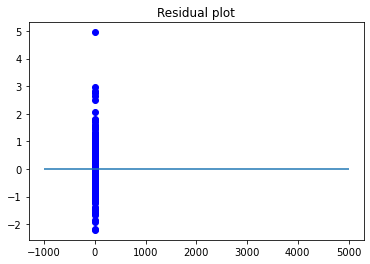

In [57]:
x_plot = plt.scatter(y_pred, (y_pred - y_test), c='b')

plt.hlines(y=0, xmin= -1000, xmax=5000)

plt.title('Residual plot')

In [58]:
y_pred[0]

array([0.51021403, 0.7963345 , 1.070543  ], dtype=float32)

In [59]:
y_test[0]

array([0.51022675, 0.79638884, 1.07054466])

In [61]:
import pickle
pickle.dump(pipe_regression_model,open('C:/Users/ASUS/TECHNOCOLAB_INTERNSHIP/ML_DEPLOYMENT_MODELS/regression_xgboost_pipeline.pkl',"wb"))